In [1]:
# подключаем библиотеку для работы с массивами
import numpy as np

In [2]:
# подключаем библиотеку для работы с нечёткими множествами
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#библиотека для построения графика
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Cоздаем нечеткие переменные, которые будут частью условия (антецеденты)
# Antecedent (вход / датчик) переменная для нечёткой системы управления.
# skfuzzy.control.Antecedent(массив/список одномерный конвертируемый в NumPy, метка / название)
# Для задания массива функцию arange(стартовое значение, конечное значение, шаг),
# этот массив определяет универсум лингвистической переменной (массив четких значений)
# Задаются 2 входные и 1 выходная лингвистическая переменная
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [5]:
# Разбиваем автоматически массив, для построения функции принадлежности, можно выбрать вариант 3, 5 или 7 термов
quality.automf(3)
service.automf(3)

In [6]:
# Задаем выходную переменную через треугольную функцию
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

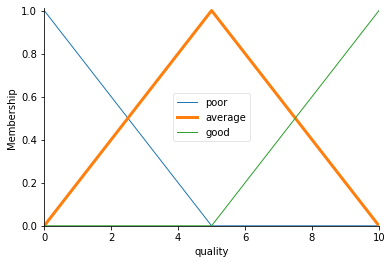

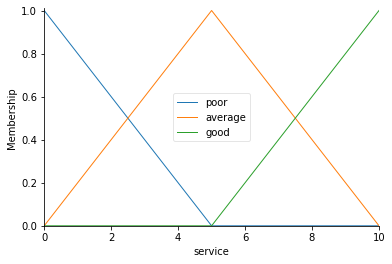

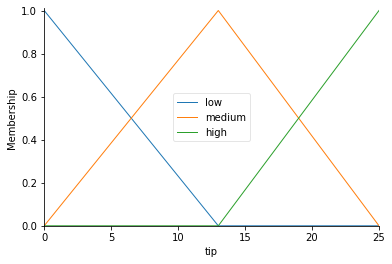

In [7]:
# визуализируем переменные
quality['average'].view()
service.view()
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f14b9e12f50>)

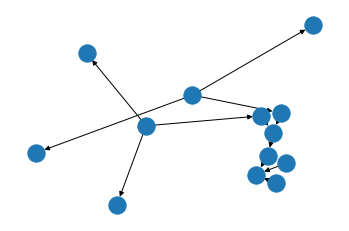

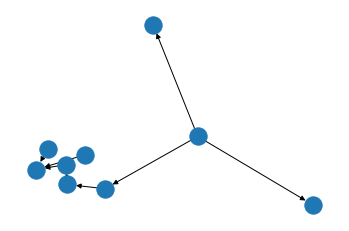

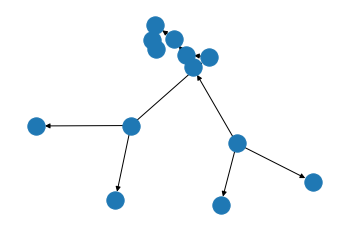

In [8]:
# ЕСЛИ обслуживание было хорошим или качество еды было хорошим, ТОГДА чаевые будут высокими.
# ЕСЛИ обслуживание было средним, ТО чаевые будут средними.
# ЕСЛИ обслуживание было плохим, а качество еды было плохим, ТОГДА чаевые будут низкими.
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule1.view()
rule2.view()
rule3.view()

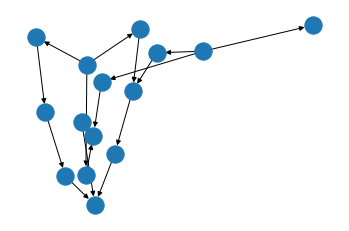

In [9]:
# Создаем базу из 3 правил
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# Визуализируем
tipping_ctrl.view()

In [10]:
# Создаем модель расчёта
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [11]:
# Подаем на вход четкие числа
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

In [12]:
# запускаем расчет
tipping.compute()

In [13]:
# Печатаем результат
print (tipping.output['tip'])

19.847607361963192


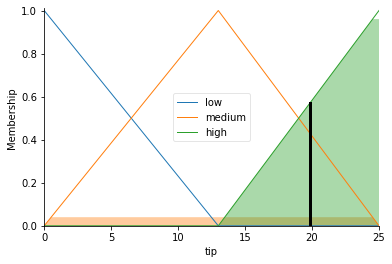

In [14]:
# выводим результат в виде графика
tip.view(sim=tipping)

In [15]:
# Строим трехмерную плоскость зависимости выходной переменной от 2 входных
# определяем значения по осям в виде массива
upsampled = np.arange(0, 26, 1)

In [16]:
# meshgrid создаем прямоугольную сетку из массива значений x и массивзначений y.
x, y = np.meshgrid(upsampled, upsampled)

In [17]:
# zeros_like() возвращает новый массив из нулей с формой и типом данных указанного массива
z = np.zeros_like(x)

In [18]:
# вычисляем значения z в каждой точке
for i in range(26):
    for j in range(26):
        tipping.input['quality'] = x[i, j]
        tipping.input['service'] = y[i, j]
        tipping.compute()
        z[i, j] = tipping.output['tip']

In [19]:
# Строим по полученным значениям график
# определяем размер рисунка под график
fig = plt.figure(figsize=(25, 25))

<Figure size 1800x1800 with 0 Axes>

In [20]:
# определяем трехмерность графика
ax = fig.add_subplot(111, projection='3d')

In [21]:
# создаем 3d поверхность
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
linewidth=0.4, antialiased=True)

In [22]:
# создаем контуры (проекции)
cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=30, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=30, cmap='viridis', alpha=0.5)

In [23]:
# устанавливаем угол наклона графика и показываем
ax.view_init(50, 200)